In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'grid'])
plt.rcParams['text.latex.preamble'] = r'''
    \usepackage[T1]{fontenc}
    \usepackage{XCharter}
    \usepackage[charter,vvarbb,scaled=1.05]{newtxmath}
'''

In [2]:
t_s = 10
t_dotsq = 4
# Camera matrix

def agility_bangbang(theta):
    # return np.ones_like(theta) * 20
    return t_s + t_dotsq * np.sqrt(np.abs(theta))

def agility_constant(theta):
    return np.ones_like(theta) * 15


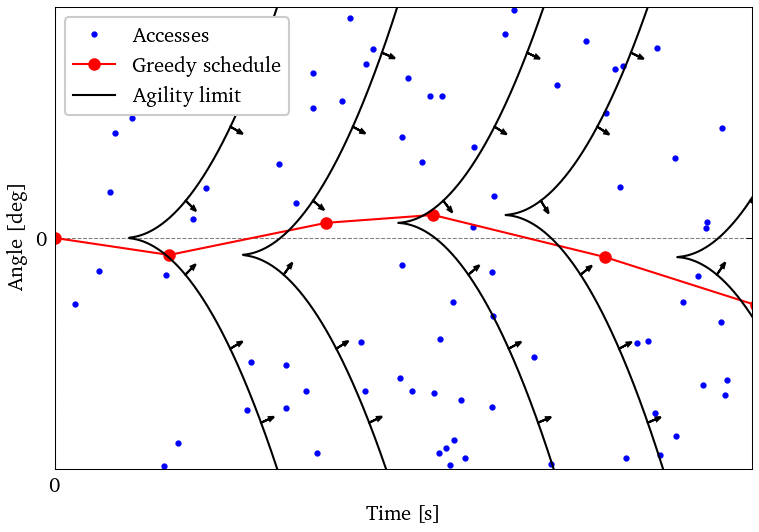

In [4]:
# Random samples
field_of_regard = 30
total_future_time = 120 # seconds
N = 100

# Samples from 2D uniform distribution
np.random.seed(7)  # for reproducibility
t = np.sort(np.random.uniform(0, total_future_time, N))
theta = np.random.uniform(-field_of_regard, field_of_regard, N)
t[0] = 0 
theta[0] = 0

# Concatenate the samples
samples = np.column_stack((t, theta))

# Greedy schedule
schedule = [samples[0]]
for t, theta in samples:
    t_bangbang = agility_bangbang(theta - schedule[-1][1])
    if schedule[-1][0] + t_bangbang <= t:
        schedule.append((t, theta))

plt.figure(figsize=(6, 4), dpi=150)
# Plot the infeasibility
# prepare the angle grid
plt.plot(samples[:, 0], samples[:, 1], 'o', markersize=2, color='blue', label='Accesses')
plt.plot(*zip(*schedule), 'o-', markersize=5, color='red', label='Greedy schedule')
angle_slew = np.linspace(-field_of_regard, field_of_regard, 1000)

for i, (s_t, s_ang) in enumerate(schedule):
    angle_diff = angle_slew - s_ang
    t_limit = agility_bangbang(angle_diff)
    x_line = s_t + t_limit
    y_line = angle_slew

    # plot the line
    plt.plot(x_line, y_line, 'k-', label='Agility limit' if i == 0 else None)

    # pick a few indices to draw arrows at
    idxs = np.linspace(100, 900, 6, dtype=int)
    for j, idx in enumerate(idxs):
        # local derivative dt_limit/dθ = t_dotsq * 0.5 * sign(angle_diff)/sqrt(abs(angle_diff))
        dtdtheta = t_dotsq * 0.5 * np.sign(angle_diff[idx]) / np.sqrt(np.abs(angle_diff[idx]) + 1e-6)
        # dtdtheta = 0
        # tangent vector v = (dx, dy) = (dtdθ, 1)
        v = np.array([dtdtheta, 1.0])
        # normal vector n = (-dy, dx)
        n = np.array([-v[1], v[0]])
        n = n / np.linalg.norm(n)

        arrow_len = -2.0  # tweak this for arrow size
        plt.arrow(
            x_line[idx], y_line[idx],
            n[0] * arrow_len, n[1] * arrow_len,
            head_width=0.5, head_length=0.7,
            fc='k', ec='k', length_includes_head=True,
        )

plt.xlim(0, 100)
plt.ylim(-field_of_regard, field_of_regard)
plt.xlabel('Time [s]')
plt.ylabel('Angle [deg]')
plt.legend()
plt.xticks([0])
plt.yticks([0])
plt.savefig("scheduling_problem_exact.pdf")
plt.show()

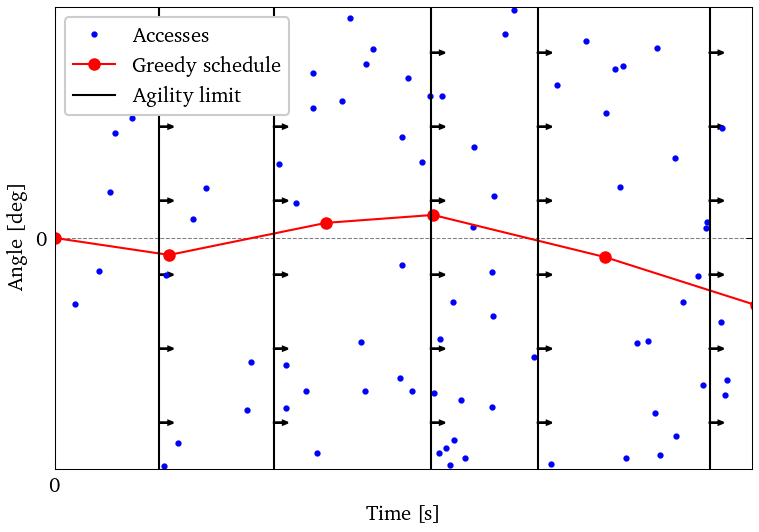

In [4]:
plt.figure(figsize=(6, 4), dpi=150)
# Plot the infeasibility
# prepare the angle grid
plt.plot(samples[:, 0], samples[:, 1], 'o', markersize=2, color='blue', label='Accesses')
plt.plot(*zip(*schedule), 'o-', markersize=5, color='red', label='Greedy schedule')
angle_slew = np.linspace(-field_of_regard, field_of_regard, 1000)

for i, (s_t, s_ang) in enumerate(schedule):
    angle_diff = angle_slew - s_ang
    t_limit = agility_constant(angle_diff)
    x_line = s_t + t_limit
    y_line = angle_slew

    # plot the line
    plt.plot(x_line, y_line, 'k-', label='Agility limit' if i == 0 else None)

    # pick a few indices to draw arrows at
    idxs = np.linspace(100, 900, 6, dtype=int)
    for j, idx in enumerate(idxs):
        # local derivative dt_limit/dθ = t_dotsq * 0.5 * sign(angle_diff)/sqrt(abs(angle_diff))
        dtdtheta = 0
        # tangent vector v = (dx, dy) = (dtdθ, 1)
        v = np.array([dtdtheta, 1.0])
        # normal vector n = (-dy, dx)
        n = np.array([-v[1], v[0]])
        n = n / np.linalg.norm(n)

        arrow_len = -2.0  # tweak this for arrow size
        plt.arrow(
            x_line[idx], y_line[idx],
            n[0] * arrow_len, n[1] * arrow_len,
            head_width=0.5, head_length=0.7,
            fc='k', ec='k', length_includes_head=True,
        )

plt.xlim(0, 100)
plt.ylim(-field_of_regard, field_of_regard)
plt.xlabel('Time [s]')
plt.ylabel('Angle [deg]')
plt.legend(loc='upper left')
plt.xticks([0])
plt.yticks([0])
plt.savefig("scheduling_problem_flat.pdf")
plt.show()

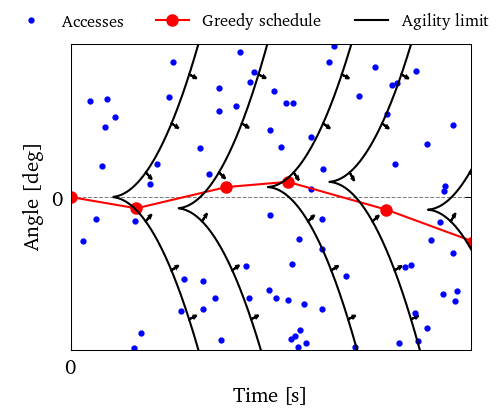

In [21]:
# The small versions

# Random samples
field_of_regard = 30
total_future_time = 120 # seconds
N = 100

# Samples from 2D uniform distribution
np.random.seed(7)  # for reproducibility
t = np.sort(np.random.uniform(0, total_future_time, N))
theta = np.random.uniform(-field_of_regard, field_of_regard, N)
t[0] = 0 
theta[0] = 0

# Concatenate the samples
samples = np.column_stack((t, theta))

# Greedy schedule
schedule = [samples[0]]
for t, theta in samples:
    t_bangbang = agility_bangbang(theta - schedule[-1][1])
    if schedule[-1][0] + t_bangbang <= t:
        schedule.append((t, theta))

plt.figure(figsize=(3.5, 3), dpi=150)
# Plot the infeasibility
# prepare the angle grid
plt.plot(samples[:, 0], samples[:, 1], 'o', markersize=2, color='blue', label='Accesses')
plt.plot(*zip(*schedule), 'o-', markersize=5, color='red', label='Greedy schedule')
angle_slew = np.linspace(-field_of_regard, field_of_regard, 1000)

for i, (s_t, s_ang) in enumerate(schedule):
    angle_diff = angle_slew - s_ang
    t_limit = agility_bangbang(angle_diff)
    x_line = s_t + t_limit
    y_line = angle_slew

    # plot the line
    plt.plot(x_line, y_line, 'k-', label='Agility limit' if i == 0 else None)

    # pick a few indices to draw arrows at
    idxs = np.linspace(100, 900, 6, dtype=int)
    for j, idx in enumerate(idxs):
        # local derivative dt_limit/dθ = t_dotsq * 0.5 * sign(angle_diff)/sqrt(abs(angle_diff))
        dtdtheta = t_dotsq * 0.5 * np.sign(angle_diff[idx]) / np.sqrt(np.abs(angle_diff[idx]) + 1e-6)
        # dtdtheta = 0
        # tangent vector v = (dx, dy) = (dtdθ, 1)
        v = np.array([dtdtheta, 1.0])
        # normal vector n = (-dy, dx)
        n = np.array([-v[1], v[0]])
        n = n / np.linalg.norm(n)

        arrow_len = -2.0  # tweak this for arrow size
        plt.arrow(
            x_line[idx], y_line[idx],
            n[0] * arrow_len, n[1] * arrow_len,
            head_width=0.5, head_length=0.7,
            fc='k', ec='k', length_includes_head=True,
        )

plt.xlim(0, 100)
plt.ylim(-field_of_regard, field_of_regard)
plt.xlabel('Time [s]')
plt.ylabel('Angle [deg]')
plt.legend(ncol=3, fontsize=8, frameon=False, bbox_to_anchor=(0.45, 1.15), loc='upper center')
plt.xticks([0])
plt.yticks([0])
plt.tight_layout()
plt.savefig("scheduling_problem_exact_small.pdf")
plt.show()

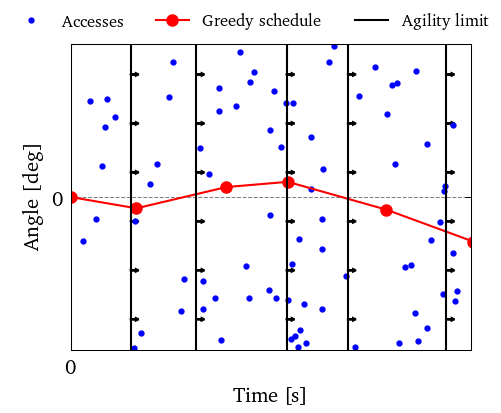

In [22]:
plt.figure(figsize=(3.5, 3), dpi=150)
# Plot the infeasibility
# prepare the angle grid
plt.plot(samples[:, 0], samples[:, 1], 'o', markersize=2, color='blue', label='Accesses')
plt.plot(*zip(*schedule), 'o-', markersize=5, color='red', label='Greedy schedule')
angle_slew = np.linspace(-field_of_regard, field_of_regard, 1000)

for i, (s_t, s_ang) in enumerate(schedule):
    angle_diff = angle_slew - s_ang
    t_limit = agility_constant(angle_diff)
    x_line = s_t + t_limit
    y_line = angle_slew

    # plot the line
    plt.plot(x_line, y_line, 'k-', label='Agility limit' if i == 0 else None)

    # pick a few indices to draw arrows at
    idxs = np.linspace(100, 900, 6, dtype=int)
    for j, idx in enumerate(idxs):
        # local derivative dt_limit/dθ = t_dotsq * 0.5 * sign(angle_diff)/sqrt(abs(angle_diff))
        dtdtheta = 0
        # tangent vector v = (dx, dy) = (dtdθ, 1)
        v = np.array([dtdtheta, 1.0])
        # normal vector n = (-dy, dx)
        n = np.array([-v[1], v[0]])
        n = n / np.linalg.norm(n)

        arrow_len = -2.0  # tweak this for arrow size
        plt.arrow(
            x_line[idx], y_line[idx],
            n[0] * arrow_len, n[1] * arrow_len,
            head_width=0.5, head_length=0.7,
            fc='k', ec='k', length_includes_head=True,
        )

plt.xlim(0, 100)
plt.ylim(-field_of_regard, field_of_regard)
plt.xlabel('Time [s]')
plt.ylabel('Angle [deg]')
plt.legend(ncol=3, fontsize=8, frameon=False, bbox_to_anchor=(0.45, 1.15), loc='upper center')
plt.xticks([0])
plt.yticks([0])
plt.tight_layout()
plt.savefig("scheduling_problem_flat_small.pdf")
plt.show()